# Introduction to medical audio processing at the edge

Based on [Play Audio, Read the Files, Create a Spectrogram](https://www.kaggle.com/vbookshelf/play-audio-read-the-files-create-a-spectrogram) but implemented at the edge and pushed to [GitHub](www.github.com)

What you'll learn:
- Listen to an audio file in a jupyter notebook
- Read the files associated with this dataset
- Create a spectrogram
- Read an audio file as a numpy array
- Slice an audio file into sections

In [1]:
# Install required libraries
# Consider using a virtual environment to protect your device's state
!pip install -r ../requirements.txt

In [140]:
# Import main libraries 
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

# Don't Show Warning Messages
import warnings
warnings.filterwarnings('ignore')

## Exploring the files

In [141]:
os.listdir('../data')

['demographic_info.txt', 'respiratory_sound_database']

In [142]:
os.listdir('../data/respiratory_sound_database')

['audio_and_txt_files',
 'patient_diagnosis.csv',
 'filename_differences.txt',
 'filename_format.txt']

## Reading text files
---
Reading the `demographig_info.txt` file

In [143]:
path ='../data/demographic_info.txt'
col_names = ['patient_id', 'age', 'sex', 'adult_bmi', 'child_weight', 'child_height']

# Adult BMI (kg/m2)
# Child Weight (kg)
# Child Height (cm)

df_demo = pd.read_csv(path, sep=" ", header=None, names=col_names)

df_demo.head(10)

,patient_id,age,sex,adult_bmi,child_weight,child_height
0,101,3.00,F,NaN,19.0,99.0
1,102,0.75,F,NaN,9.8,73.0
2,103,70.00,F,33.00,NaN,NaN
3,104,70.00,F,28.47,NaN,NaN
4,105,7.00,F,NaN,32.0,135.0
5,106,73.00,F,21.00,NaN,NaN
6,107,75.00,F,33.70,NaN,NaN
7,108,3.00,M,NaN,NaN,NaN
8,109,84.00,F,33.53,NaN,NaN
9,110,75.00,M,25.21,NaN,NaN


Reading the `patient_diagnosis.csv` file

In [144]:
path = \
'../data/respiratory_sound_database/patient_diagnosis.csv'

df_diag = pd.read_csv(path, header=None, names=['patient_id', 'diagnosis'])

df_diag.head(10)

,patient_id,diagnosis
0,101,URTI
1,102,Healthy
2,103,Asthma
3,104,COPD
4,105,URTI
5,106,COPD
6,107,COPD
7,108,LRTI
8,109,COPD
9,110,COPD


List files in the `audio_and_txt_files`

In [145]:
path = \
'../data/respiratory_sound_database/audio_and_txt_files'

os.listdir(path)

['141_1b3_Al_mc_LittC2SE.txt',
 '205_1b3_Ll_mc_AKGC417L.txt',
 '140_2b3_Ll_mc_LittC2SE.txt',
 '117_1b2_Tc_mc_LittC2SE.txt',
 '211_1p2_Pr_mc_AKGC417L.wav',
 '163_2b2_Ll_mc_AKGC417L.txt',
 '138_1p4_Tc_mc_AKGC417L.txt',
 '213_1p2_Tc_mc_AKGC417L.wav',
 '204_2b5_Ll_mc_AKGC417L.txt',
 '157_1b1_Pl_sc_Meditron.wav',
 '125_1b1_Tc_sc_Meditron.txt',
 '172_2b5_Tc_mc_AKGC417L.txt',
 '161_1b1_Al_sc_Meditron.txt',
 '211_2p4_Tc_mc_AKGC417L.wav',
 '102_1b1_Ar_sc_Meditron.txt',
 '147_2b4_Ll_mc_AKGC417L.wav',
 '163_8b3_Pl_mc_AKGC417L.wav',
 '130_2b4_Al_mc_AKGC417L.txt',
 '178_1b3_Ar_mc_AKGC417L.wav',
 '140_2b2_Tc_mc_LittC2SE.txt',
 '184_1b1_Ar_sc_Meditron.wav',
 '134_2b3_Ar_mc_LittC2SE.txt',
 '130_2b2_Lr_mc_AKGC417L.txt',
 '157_1b1_Pl_sc_Meditron.txt',
 '130_2p5_Al_mc_AKGC417L.wav',
 '142_1b1_Pl_mc_LittC2SE.txt',
 '160_1b3_Al_mc_AKGC417L.wav',
 '172_2b5_Pr_mc_AKGC417L.wav',
 '170_1b3_Pr_mc_AKGC417L.wav',
 '219_2b1_Tc_mc_LittC2SE.txt',
 '130_1p2_Tc_mc_AKGC417L.wav',
 '213_2p2_Pl_mc_AKGC417L.wav',
 '201_1b

## Listening to audio files

In [146]:
# Imports
from __future__ import print_function

# matplotlib for displaying the output
import matplotlib.pyplot as plt
%matplotlib inline

# and IPython.display for audio output
import IPython
import IPython.display

# Librosa for audio
import librosa
# And the display module for visualization
import librosa.display

# pydub to play audio files
from pydub import AudioSegment

In [149]:
audio_extension = ".wav"
audio_file = '213_1p5_Pr_mc_AKGC417L'

audio_path = path + '/' + audio_file + audio_extension

# resample the signal to 22050Hz (default)
#y, sr = librosa.load(audio_path)

# uncomment to resample at 44.1KHz
# y, sr = librosa.load(audio_path, sr=44100)

# Disable resampling since the files are already at 44.1Khz
y, sr = librosa.load(audio_path, sr=None)

In [150]:
# Play our file with default sampling rate
IPython.display.Audio(y, rate=sr)

## Reading annotation file

Let's take a look at the annotation text file for this audio recording to see how many respiration cycles have been recorded.

Read an annotation file

In [155]:
# Annotation files have the same file name are stored in text format (*.txt)
annotation_extension = ".txt"
audio_file = '213_1p5_Pr_mc_AKGC417L'

annotation_path = path + '/' + audio_file + annotation_extension

In [156]:
col_names = ['Beginning_of_respiratory_cycle', 'End_of_respiratory_cycle', 'Presence/absence_of_crackles', 'Presence/absence_of_wheezes']

# Respiratory cycle column values are in 'seconds'.
# Presence = 1
# Absence = 0

df_annot = pd.read_csv(annotation_path, sep="\t", header=None, names=col_names)

df_annot.head(20)

,Beginning_of_respiratory_cycle,End_of_respiratory_cycle,Presence/absence_of_crackles,Presence/absence_of_wheezes
0,6.302,8.356,0,0
1,8.356,10.643,1,0
2,10.643,13.063,0,0
3,13.063,15.284,0,0
4,15.284,17.638,0,0
5,17.638,19.908,1,0


This recording has 6 respiration cycles and crackles are present on 2 out of 7 cycles.

### Mel Spectrogram
---
The Mel Spectrogram plots a combination of the [Mel Scale](https://en.wikipedia.org/wiki/Mel_scale) (the melodic scale) and the [Spectrogram](https://en.wikipedia.org/wiki/Spectrogram) (AKA Loudness or Dynamic Range) of the audio file.

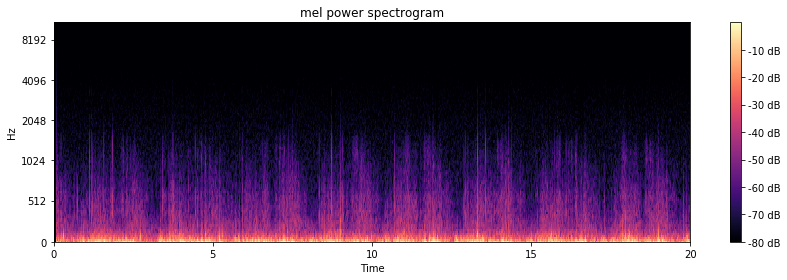

In [157]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

## Slicing a section of an audio file

In [158]:
# NEED TO IMPLEMENT FOR LOOP and go through all cycles

In [159]:
# Slice the first respiratory cycle
cycle = 0

# note: Time is given in seconds. Will be converted to milliseconds later.
start_time = df_annot['Beginning_of_respiratory_cycle'][cycle]
end_time = df_annot['End_of_respiratory_cycle'][cycle]
print("cycle #",cycle,start_time,"-",end_time)

cycle # 0 6.3020000000000005 - 8.356


In [160]:
# https://stackoverflow.com/questions/37999150/
# python-how-to-split-a-wav-file-into-multiple-wav-files

from pydub import AudioSegment

t1 = start_time * 1000 # pydub works in milliseconds
t2 = end_time * 1000
newAudio = AudioSegment.from_wav(audio_path) # path is defined above

In [161]:
# Save in a new file
out_format = "wav"
slice_filename = "../slices/" + audio_file[:3] + "-cycle-" + str(cycle) + '.' + out_format

newAudio = newAudio[t1:t2]
newAudio.export(slice_filename, format=out_format)

<_io.BufferedRandom name='../slices/213-cycle-0.wav'>

### Reading sliced file

In [162]:
audio_path = slice_filename

# resample the signal to 22050Hz (default)
#y, sr = librosa.load(audio_path)

# uncomment to resample at 44.1KHz
# y, sr = librosa.load(audio_path, sr=44100)

# Disable resampling since the files are already at 44.1Khz
y, sr = librosa.load(audio_path, sr=None)

In [163]:
# Play our file with default sampling rate
IPython.display.Audio(y, rate=sr)

### Mel Spectrogram of sliced audio
---
The Mel Spectrogram plots a combination of the [Mel Scale](https://en.wikipedia.org/wiki/Mel_scale) (the melodic scale) and the [Spectrogram](https://en.wikipedia.org/wiki/Spectrogram) (AKA Loudness or Dynamic Range) of the audio file.

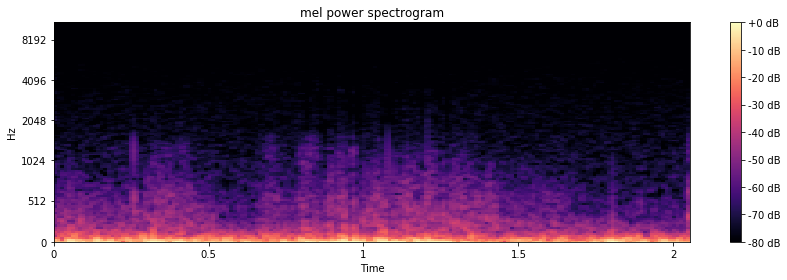

In [165]:
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S = librosa.feature.melspectrogram(y, sr=sr, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the spectrogram on a mel scale
# sample rate and hop length parameters are used to render the time axis
librosa.display.specshow(log_S, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

### Harmonic-percussive source separation


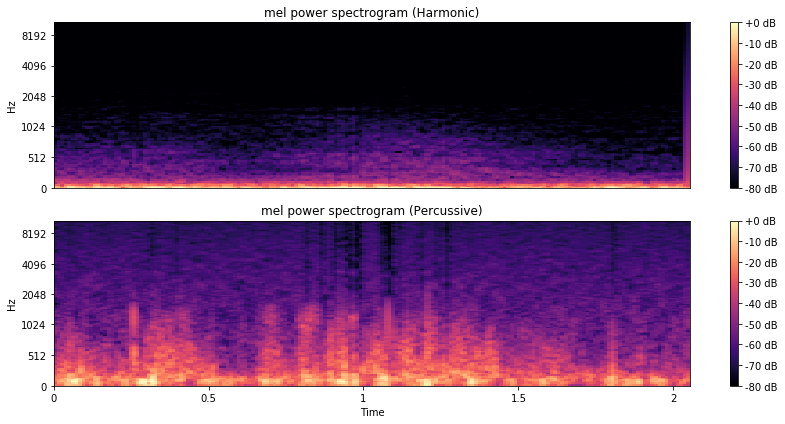

In [168]:
y_harmonic, y_percussive = librosa.effects.hpss(y)

# What do the spectrograms look like?
# Let's make and display a mel-scaled power (energy-squared) spectrogram
S_harmonic   = librosa.feature.melspectrogram(y_harmonic, sr=sr)
S_percussive = librosa.feature.melspectrogram(y_percussive, sr=sr)

# Convert to log scale (dB). We'll use the peak power as reference.
log_Sh = librosa.power_to_db(S_harmonic, ref=np.max)
log_Sp = librosa.power_to_db(S_percussive, ref=np.max)

# Make a new figure
plt.figure(figsize=(12,6))

plt.subplot(2,1,1)
# Display the spectrogram on a mel scale
librosa.display.specshow(log_Sh, sr=sr, y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Harmonic)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

plt.subplot(2,1,2)
librosa.display.specshow(log_Sp, sr=sr, x_axis='time', y_axis='mel')

# Put a descriptive title on the plot
plt.title('mel power spectrogram (Percussive)')

# draw a color bar
plt.colorbar(format='%+02.0f dB')

# Make the figure layout compact
plt.tight_layout()

### Chromagram
---
Chroma features will represent pitch class information

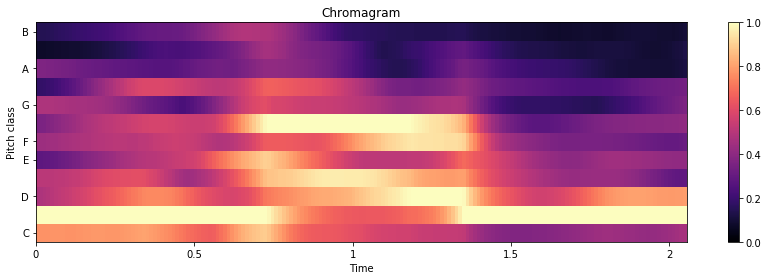

In [169]:
# We'll use a CQT-based chromagram with 36 bins-per-octave in the CQT analysis.  An STFT-based implementation also exists in chroma_stft()
# We'll use the harmonic component to avoid pollution from transients
C = librosa.feature.chroma_cqt(y=y_harmonic, sr=sr, bins_per_octave=36)

# Make a new figure
plt.figure(figsize=(12,4))

# Display the chromagram: the energy in each chromatic pitch class as a function of time
# To make sure that the colors span the full range of chroma values, set vmin and vmax
librosa.display.specshow(C, sr=sr, x_axis='time', y_axis='chroma', vmin=0, vmax=1)

plt.title('Chromagram')
plt.colorbar()

plt.tight_layout()

### MFCC
---
Mel-frequency cepstral coefficients are commonly used to represent texture or timbre of sound.

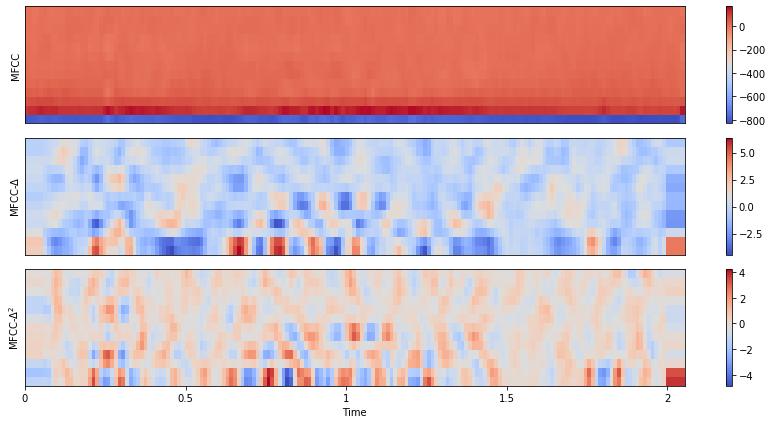

In [170]:
# Next, we'll extract the top 13 Mel-frequency cepstral coefficients (MFCCs)
mfcc        = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta_mfcc  = librosa.feature.delta(mfcc)
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

# How do they look?  We'll show each in its own subplot
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
librosa.display.specshow(mfcc)
plt.ylabel('MFCC')
plt.colorbar()

plt.subplot(3,1,2)
librosa.display.specshow(delta_mfcc)
plt.ylabel('MFCC-$\Delta$')
plt.colorbar()

plt.subplot(3,1,3)
librosa.display.specshow(delta2_mfcc, sr=sr, x_axis='time')
plt.ylabel('MFCC-$\Delta^2$')
plt.colorbar()

plt.tight_layout()

# For future use, we'll stack these together into one matrix
M = np.vstack([mfcc, delta_mfcc, delta2_mfcc])

## Read an audio file as a numpy array

In [29]:
path = \
'../data/respiratory_sound_database/audio_and_txt_files/' + audio_file + file_extension

# read the file
data, rate = sf.read(path)

# display the numpy array
data

array([ 0.        ,  0.        ,  0.        , ..., -0.02780175,
       -0.02639532, -0.02856123])

## Resources

- Andrew Ng Sequence Models Course, Week 3, Trigger Word Detection Assignment
https://www.coursera.org/learn/nlp-sequence-models

- PySoundFile Library
https://pysoundfile.readthedocs.io/en/0.10.0/

- How to read a 24 bit wav file
https://stackoverflow.com/questions/16719453/how-to-read-and-write-24-bit-wav-file-using-scipy-or-common-alternative

- PyDub Library
https://github.com/jiaaro/pydub